# Web Scraping Assignment
- Hyeyeon Kim
- Due date: 2020-09-13

## HouseSigma

- Scraping condo listings in Toronto
- Using Selenium and BeautifulSoup


In [586]:
# !pip install selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support.expected_conditions import presence_of_element_located
from selenium.webdriver import Chrome
from time import sleep
import pandas as pd
import numpy as np

In [587]:
driver = Chrome() #webdriver downloaded and saved in the same folder
url ='https://housesigma.com'
driver.get(url)
#Clicking sign-in page
element = driver.find_element_by_xpath("//a[contains(@class, 'global-link user_left_part')]")
element.click()
sleep(1)

# Log-in
element_email = driver.find_element_by_xpath("//input[contains(@placeholder, 'Email Address')]")
element_email.send_keys('hykimusa@gmail.com')
element_pw = driver.find_element_by_xpath('//input[contains(@placeholder, "Password")]')
element_pw.send_keys('housesigmapw4$')
sleep(1)
element_sign_in_button = driver.find_element_by_xpath('//*[contains(@class, "el-button signin el-button--primary")]')
element_sign_in_button.click()

## Recommend
- Setting your criteria

In [588]:
# Setting parameters
# Clicking Recommend button
element_recommend = driver.find_element_by_xpath('//*[text()="Recommend"]')
element_recommend.click()
sleep(2)

# # Price Range
# def price_range(low_end, high_end):
#     price_range = f'${low_end} - ${high_end}'
#     return price_range

# # test
# price_range(500000, 750000)

# What is your budget?
# I needed to edit 'attribute'
# https://stackoverflow.com/questions/41553189/edit-element-in-browser-with-python-selenium

# element_price_range = driver.find_element_by_xpath('//div[contains(@class, "price_tooltip")]')
# driver.execute_script(f"arguments[0].innerText = '{price_range(500000, 750000)}'", element_price_range)

# Investment
element_investment_all = driver.find_element_by_xpath('//*[@id="recommend"]/div[3]/div[2]/div[2]/span[1]')
# element_investment_school = driver.find_element_by_xpath('//div[text()="School"]')
# element_investment_growth = driver.find_element_by_xpath('//div[text()="Growth"]')
# element_investment_rentalyield = driver.find_element_by_xpath('//div[text()="Rental Yeild"]')
# element_investment_land = driver.find_element_by_xpath('//div[text()="Land"]')
# sleep(1)
element_investment_all.click();
# element_investment_school.click()
# element_investment_growth.click()
# element_investment_rentalyield.click()
# element_investment_land.click()
# sleep(2)

# Property Type
# element_type_detached = driver.find_element_by_xpath('//div[text()="Detached"]')
# element_type_semidetached = driver.find_element_by_xpath('//div[text()="Semi-Detached"]')
# element_type_townhouse = driver.find_element_by_xpath('//div[text()="Townhouse"]')
element_type_condo = driver.find_element_by_xpath('//div[text()="Condo Apt"]')
# element_type_detached.click()
# element_type_semidetached.click()
# element_type_townhouse.click()
element_type_condo.click();
sleep(2)

In [589]:
# City/Location
# element_city_all = driver.find_element_by_xpath('//*[@id="recommend"]/div[3]/div[4]/div[2]/span[1]')
# element_city_reset = driver.find_element_by_xpath('//*[@id="recommend"]/div[3]/div[4]/div[2]/span[2]')
element_city_toronto = driver.find_element_by_xpath('/html/body/div/div/div[3]/div[4]/div[1]/div[1]/div[2]/span[1]')
element_city_toronto.click();

# element_city_northyork = driver.find_element_by_xpath('//*[text()="North York"]')
# element_city_etobicoke = driver.find_element_by_xpath('//*[text()="Etobicoke"]')
# element_city_markham = driver.find_element_by_xpath('//*[text()="Markham"]')
# element_city_richmondhill = driver.find_element_by_xpath('//*[text()="Richmond Hill"]')
# element_city_scarborough = driver.find_element_by_xpath('//*[text()="Scarborough"]')
# element_city_all.click()
# element_city_reset.click()
# element_city_toronto.click()
# element_city_northyork.click()
# element_city_etobicoke.click()
# element_city_scarborough.click()
# element_city_markham.click()
# element_city_richmondhill.click()



ElementClickInterceptedException: Message: element click intercepted: Element <span>...</span> is not clickable at point (507, 699). Other element would receive the click: <div data-v-06d9ba0f="" class="el-col el-col-24 el-col-xs-22 el-col-sm-22 el-col-md-20 el-col-lg-16">...</div>
  (Session info: chrome=85.0.4183.102)


In [591]:
# Search Recommendations
element_start_recommendation = driver.find_element_by_xpath('//*[text() = "Start Recommendation"]')
element_start_recommendation.click();

In [592]:
# Scroll to bottom
# driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
# Open 10 pages
for i in range(10):
    driver.execute_script(f"window.scrollTo({i}, document.body.scrollHeight);")
    sleep(1)

In [593]:
# Create empty lists
list_num =[]
address =[]
city_name =[]
house_type =[]
listing_price =[]
estimated_price =[]
estimate_date =[]
bedroom =[]
washroom =[]
parking =[]
tax =[]
maintenance =[]
building_age =[]
size =[]
listed_on =[]
updated_on =[]
# market_demand
rental_estimate =[]
rental_yield =[]
intersection =[]
property_style =[]
exposure =[]
description =[]


In [ ]:
for i in range(10):
    driver.execute_script(f"window.scrollTo({i}, document.body.scrollHeight);")
    sleep(1)

In [596]:
# Selecting community
community_list = driver.find_elements_by_xpath('//*[@id="recommend"]/div[3]/div[7]/div')# Finding number of lists per webpage

for i in range(1, len(community_list)):
    element_community = driver.find_element_by_xpath(f'//*[@id="recommend"]/div[3]/div[7]/div[{i}]/div[2]/div[2]/div[4]/span/button/span')
    element_community.click()
    print(f'Community-{i}')
    sleep(3)

    post_list = driver.find_elements_by_xpath('//*[@id="recommend"]/div[2]/div/div[2]/div[3]/div[1]/div')
    print(len(post_list))

    for i in range(1,len(post_list)+1):
        post = driver.find_element_by_xpath(f'//*[@id="recommend"]/div[2]/div/div[2]/div[3]/div[1]/div[{i}]/div/div[1]/a')
        post.click() #clicks on the posted listing
        # new tab opens
        driver.switch_to.window(driver.window_handles[-1]) #moves controller to the last opened tab handle
        #now able to control the newly opened tab
        sleep(2)

        # Scraping the listing details
        try:
            ele_list_num = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[5]/div[2]/div[1]/span').text
        except:
            ele_list_num = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[6]/div[2]/div[1]/span').text
        ele_address = driver.find_element_by_xpath('//div[@class = "address"]').text
        ele_city_name = driver.find_element_by_xpath('//div[@class = "city_name"]').text
        ele_house_type = driver.find_element_by_xpath('//div[@class = "house_type"]').text

        try:
            ele_listing_price = driver.find_element_by_xpath('//div[@class = "price_listing"]/span').text
        except:
            pass

        try:
            ele_estimated_price = driver.find_element_by_xpath('//div[@class = "price_dollar"]').text
        except:
            ele_estimated_price = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[6]/div[1]/div[1]/p').text
        try:
            ele_estimate_date = driver.find_element_by_xpath('//div[@class = "estimate_date"]').text
        except:
            ele_estimate_date = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[6]/div[1]/div[2]/p')
        ele_bedroom = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[1]/div/div/div[1]/span').text
        ele_washroom = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[1]/div/div/div[2]/span').text
        ele_parking = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[1]/div/div/div[3]/span').text
        try:
            ele_tax = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[5]/div[1]/div[1]/span').text
        except:
            ele_tax = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[6]/div[1]/div[1]/span').text
        try:
            ele_maintenance = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[5]/div[1]/div[3]/span').text
        except:
            ele_maintenance = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[6]/div[1]/div[3]/span').text
        try:
            ele_building_age = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[5]/div[1]/div[4]/span').text
        except:
            ele_building_age = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[6]/div[1]/div[5]/label').text
        try:
            ele_size = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[5]/div[1]/div[5]/span').text
        except:
            ele_size = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[6]/div[1]/div[5]/span').text

        try:
            ele_listed_on = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[5]/div[2]/div[3]/span').text
        except:
            ele_listed_on = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[6]/div[2]/div[3]/span').text

        try:
            ele_updated_on = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[5]/div[2]/div[4]/span').text
        except:
            ele_updated_on = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[6]/div[2]/div[4]/span').text
        # ele_market_demand = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[5]/div[2]/div[6]').text

        try:
            ele_rental_estimate = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[6]/div[1]/div[3]/p').text
        except:
            ele_rental_estimate = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[7]/div[1]/div[3]/p').text

        try:
            ele_rental_yield = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[6]/div[1]/div[4]/p').text
        except:
            ele_rental_yield = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[7]/div[1]/div[4]/p').text

        ele_intersection = driver.find_element_by_xpath('//*[@id="property_details"]/div[1]/div[1]/div[1]/span').text
        ele_property_style = driver.find_element_by_xpath('//*[@id="property_details"]/div[1]/div[1]/div[2]/span').text
        ele_exposure = driver.find_element_by_xpath('//*[@id="property_details"]/div[1]/div[1]/div[3]/span').text
        ele_description = driver.find_element_by_xpath('//*[@id="property_details"]/div[2]/p').text

        # Append lists
        list_num.append(ele_list_num) 
        address.append(ele_address)
        city_name.append(ele_city_name)
        house_type.append(ele_house_type) 
        listing_price.append(ele_listing_price) 
        estimated_price.append(ele_estimated_price) 
        estimate_date.append(ele_estimate_date) 
        bedroom.append(ele_bedroom) 
        washroom.append(ele_washroom) 
        parking.append(ele_parking) 
        tax.append(ele_tax) 
        maintenance.append(ele_maintenance) 
        building_age.append(ele_building_age) 
        size.append(ele_size) 
        listed_on.append(ele_listed_on) 
        updated_on.append(ele_updated_on) 
        # market_deman.append(ele_city_name)d
        rental_estimate.append(ele_rental_estimate) 
        rental_yield.append(ele_rental_yield) 
        intersection.append(ele_intersection) 
        property_style.append(ele_property_style)
        exposure.append(ele_exposure) 
        description.append(ele_description)

    #         # For checking purpose
    #         print(ele_address)
    #         sleep(1)
    #         print(ele_city_name)
    #         sleep(1)
        driver.close()#closes current, active tab
        driver.switch_to.window(driver.window_handles[0])
        sleep(2)
        print(f'Listing #{i} scraping completed')
    sleep(2)
    close_community = driver.find_element_by_xpath('//*[@id="recommend"]/div[2]/div/div[1]/button/i')
    close_community.click()
    sleep(10)

Community-1
9
Listing #1 scraping completed
Listing #2 scraping completed
Listing #3 scraping completed
Listing #4 scraping completed
Listing #5 scraping completed


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=85.0.4183.102)


In [ ]:
driver.close()#closes current, active tab
driver.switch_to.window(driver.window_handles[0])
sleep(2)

In [ ]:
close_community = driver.find_element_by_xpath('//*[@id="recommend"]/div[2]/div/div[1]/button/i')
close_community.click()
sleep(10)

In [ ]:
# # Selecting a listing from community (for 1 post)
# # this code opens a new tab
# element_community_post = driver.find_element_by_xpath('//div[@class="pic_infor"]')
# element_community_post.click()

# # Switching to the active tab
# driver.switch_to.window(driver.window_handles[-1]) #last opened tab handle

In [ ]:
# # Scraping listing details
# ele_address = driver.find_element_by_xpath('//div[@class = "address"]').text
# ele_city_name = driver.find_element_by_xpath('//div[@class = "city_name"]').text
# ele_house_type = driver.find_element_by_xpath('//div[@class = "house_type"]').text
# ele_listing_price = driver.find_element_by_xpath('//div[@class = "price_listing"]/span').text
# ele_estimated_price = driver.find_element_by_xpath('//div[@class = "price_dollar"]').text
# ele_estimate_date = driver.find_element_by_xpath('//div[@class = "estimate_date"]').text
# ele_bedroom = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[1]/div/div/div[1]/span').text
# ele_washroom = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[1]/div/div/div[2]/span').text
# ele_parking = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[1]/div/div/div[3]/span').text
# ele_tax = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[5]/div[1]/div[1]/span').text
# ele_maintenance = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[5]/div[1]/div[3]/span').text
# ele_building_age = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[5]/div[1]/div[4]/span').text
# ele_size = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[5]/div[1]/div[5]/span').text
# ele_list_num = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[5]/div[2]/div[1]/span').text
# ele_listed_on = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[5]/div[2]/div[3]/span').text
# ele_updated_on = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[5]/div[2]/div[4]/span').text
# # ele_market_demand = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[5]/div[2]/div[6]').text
# ele_rental_estimate = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[6]/div[1]/div[3]/p').text
# ele_rental_yield = driver.find_element_by_xpath('//*[@id="room_count_to_estimate"]/div[6]/div[1]/div[4]/p').text
# ele_intersection = driver.find_element_by_xpath('//*[@id="property_details"]/div[1]/div[1]/div[1]/span').text
# ele_property_style = driver.find_element_by_xpath('//*[@id="property_details"]/div[1]/div[1]/div[2]/span').text
# ele_exposure = driver.find_element_by_xpath('//*[@id="property_details"]/div[1]/div[1]/div[3]/span').text
# ele_description = driver.find_element_by_xpath('//*[@class="desc_more"]/div[1]/div[1]/div[3]/span').text

In [ ]:
# print(ele_list_num)
# print(ele_address)
# print(ele_city_name)
# print(ele_house_type)
# print(ele_listing_price)
# print(ele_estimated_price)
# print(ele_estimate_date)
# print(ele_bedroom)
# print(ele_washroom)
# print(ele_parking)
# print(ele_tax)
# print(ele_maintenance)
# print(ele_building_age)
# print(ele_size)
# print(ele_listed_on)
# print(ele_updated_on)
# # print(ele_market_demand)
# print(ele_rental_estimate)
# print(ele_rental_yield)
# print(ele_intersection)
# print(ele_property_style)
# print(ele_exposure)
# print(ele_description)

In [598]:
print(list_num)
print(address)
print(city_name)
print(house_type)
print(listing_price)
print(estimated_price)
print(estimate_date)
print(bedroom)
print(washroom)
print(parking)
print(tax)
print(maintenance)
print(building_age)
print(size)
print(listed_on)
print(updated_on)
# print(market_demand)
print(rental_estimate)
print(rental_yield)
print(intersection)
print(property_style)
print(exposure)
print(description)

['C4844438', 'C4901798', 'C4869792', 'C4877344', 'C4796356']
['Unit 507 - 170 Chiltern Hill Rd', 'Unit 315 - 170 Chiltern Hill Rd', 'Unit 706 - 170 Chiltern Hill Rd', 'Unit 807 - 1486 Bathurst St', 'Unit 402 - 170 Chiltern Hill Rd']
['Humewood-Cedarvale - Toronto', 'Humewood-Cedarvale - Toronto', 'Humewood-Cedarvale - Toronto', 'Humewood-Cedarvale - Toronto', 'Humewood-Cedarvale - Toronto']
['Condo Apt', 'Condo Apt', 'Condo Apt', 'Condo Apt', 'Condo Apt']
['$ 579,000', '$ 499,000', '$ 569,000', '$ 649,000', '$ 979,000']
['$543,101', '$478,548', '$569,629', '$638,624', '$989,159']
['As of 2020-08-04', 'As of 2020-09-11', 'As of 2020-09-12', 'As of 2020-08-19', 'As of 2020-09-10']
['1 Bedrooms', '1 Bedrooms', '1 Bedrooms', '1 Bedrooms', '2 Bedrooms']
['1 Bathrooms', '1 Bathrooms', '1 Bathrooms', '1 Bathrooms', '2 Bathrooms']
['1 Garage', '1 Garage', '1 Garage', '1 Garage', '1 Garage']
['$ 2,224', '$ 2,444', '$ 2,441', '$ -', '$ 3,200']
['-', '$578/month', '$550/month', '$476/month', '$98

## Creating a dataframe

In [ ]:
# Into a dataframe
df = pd.DataFrame({
    'Listing_num':list_num,
    'Address':address,
    'City':city_name,
    'House_type':house_type,
    'Price':listing_price,
    'Estimated_price':estimated_price,
    'Estimated_on':estimate_date,
    'Bedroom_num':bedroom,
    'Washroom_num':washroom,
    'Parking_num':parking,
    'Tax':tax,
    'Maintenance':maintenance,
    'Building_age':building_age,
    'Size':size,
    'Listed_on':listed_on,
    'Updated_on':updated_on,
    'Rental_estimate':rental_estimate,
    'Rental_yield':rental_yield,
    'Major_intersection':intersection,
    'Property_style':property_style,
    'Exposure':exposure,
    'Description':description
})

In [ ]:
df

In [ ]:
df.shape

In [ ]:
df.to_csv('2020_HouseSigma_listing_details_4.csv', index = False)

In [176]:
# df = pd.read_csv('2020_HouseSigma_listing_details.csv')
# df2 = pd.read_csv('2020_HouseSigma_listing_details_2.csv')
# df3 = pd.read_csv('2020_HouseSigma_listing_details_3.csv')
# df4 = pd.read_csv('2020_HouseSigma_listing_details_4.csv')
# df_all = pd.concat([df, df2, df3, df4])
df_all.to_csv('2020_HouseSigma_listing_details_all.csv', index = False)

## Cleaning dataset

In [246]:
df_all = pd.read_csv('2020_HouseSigma_listing_details_all.csv')

In [203]:
df_all.shape

(931, 22)

In [204]:
df_all.head(3)

,Listing_num,Address,City,House_type,Price,Estimated_price,Estimated_on,Bedroom_num,Washroom_num,Parking_num,...,Building_age,Size,Listed_on,Updated_on,Rental_estimate,Rental_yield,Major_intersection,Property_style,Exposure,Description
0,C4844438,Unit 507 - 170 Chiltern Hill Rd,Humewood-Cedarvale - Toronto,Condo Apt,"$ 579,000","$543,101",As of 2020-08-04,1 Bedrooms,1 Bathrooms,1 Garage,...,"water,heat",-,2020-07-24,2020-08-04,"$2,082",4.02%,Bathurst & Eglinton,Apartment,N,Welcome To The Hill. Situated On The Border Of...
1,C4901798,Unit 315 - 170 Chiltern Hill Rd,Humewood-Cedarvale - Toronto,Condo Apt,"$ 499,000","$478,548",As of 2020-09-11,1 Bedrooms,1 Bathrooms,1 Garage,...,"water,heat",0-5,2020-09-08,2020-09-11,"$2,100",3.12%,Bathurst+Eglinton,Apartment,E,"Welcome To ""The Hill"" In Upper Forest Hill Vil..."
2,C4869792,Unit 706 - 170 Chiltern Hill Rd,Humewood-Cedarvale - Toronto,Condo Apt,"$ 569,000","$569,629",As of 2020-09-11,1 Bedrooms,1 Bathrooms,1 Garage,...,"water,heat",-,2020-08-13,2020-09-11,"$2,100",2.68%,Bathurst&Eglinton,Apartment,N,Welcome To Upper Forest Hill! Functional Loft ...


In [247]:
# Changing currency to float
df_all[['Price', 'Estimated_price', 'Rental_estimate']] = df_all[['Price', 'Estimated_price', 'Rental_estimate']].replace( '[\$,)]', '', regex = True).astype(float)


# Removing some words
df_all['Bedroom_num'] = df_all['Bedroom_num'].str.replace(' Bedrooms', '', regex=False)
df_all['Washroom_num'] = df_all['Washroom_num'].str.replace(' Bathrooms', '', regex=False)
df_all['Parking_num'] = df_all['Parking_num'] = df_all['Parking_num'].str.replace(' Garage', '', regex=False)
df_all['Parking_num'] = df_all['Parking_num'] = df_all['Parking_num'].str.replace(' Garage', '', regex=False)
df_all['Estimated_on'] = df_all['Estimated_on'].str.replace('As of ', '', regex=False)
df_all['Tax'] = df_all['Tax'].replace('[\$,)]', '', regex = True).str.replace(' -', '', regex=False)

# To capitalize all letters in the series
df_all['Exposure'] = df_all['Exposure'].str.upper()


In [248]:
#Replacing blank values/ with NaN
import numpy as np
df_all['Tax'].replace(r'^\s*$', np.nan, regex=True)

In [254]:
# Removing words & assigning NaN to blank cells

df_all['Maintenance'] = df_all['Maintenance'].str.replace('/month', '', regex=False).str.replace('$', '', regex=False)

for i in range(len(df_all)):
    try:
        df_all['Maintenance'].iloc[i] = float(df_all['Maintenance'].iloc[i])
    except:
        df_all['Maintenance'].iloc[i] = np.nan
#         print(i) # which row    

In [255]:
# Change to datetime object
for i in range(len(df_all)):
    string = df_all['Estimated_on'].iloc[i]
    if len(string) == 10:
        pass
    else:
        df_all['Estimated_on'].iloc[i] = np.nan
#         print(i)        

0     2020-08-04
1     2020-09-11
2     2020-09-11
3     2020-08-19
4     2020-09-10
         ...    
926   2020-09-10
927   2020-09-01
928          NaT
929   2020-09-03
930   2020-09-10
Name: Estimated_on, Length: 931, dtype: datetime64[ns]

In [257]:
df_all.to_csv('2020_HouseSigma_listing_details_all_final.csv', index = False)

## Visualizing data

In [518]:
df = pd.read_csv('2020_HouseSigma_listing_details_all_final.csv')

In [348]:
df.columns

Index(['Listing_num', 'Address', 'City', 'House_type', 'Price',
       'Estimated_price', 'Estimated_on', 'Bedroom_num', 'Washroom_num',
       'Parking_num', 'Tax', 'Maintenance', 'Building_age', 'Size',
       'Listed_on', 'Updated_on', 'Rental_estimate', 'Rental_yield',
       'Major_intersection', 'Property_style', 'Exposure', 'Description'],
      dtype='object')

In [349]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [350]:
df['Price'].sort_values(ascending = False)[0:20]

463    97800000.0
925     6295000.0
204     4999000.0
392     4290000.0
97      3999999.0
387     3225000.0
402     3195000.0
403     2999000.0
160     2998000.0
203     2995000.0
241     2895000.0
912     2895000.0
841     2750000.0
382     2700000.0
198     2598000.0
399     2589100.0
394     2450000.0
930     2450000.0
610     2450000.0
185     2404990.0
Name: Price, dtype: float64

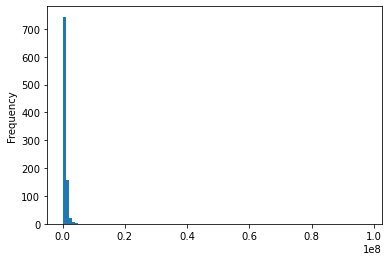

In [547]:
df['Price'].plot(kind = 'hist', bins = 100)

In [601]:
df['Price'].describe()

count    9.310000e+02
mean     9.543577e+05
std      3.215611e+06
min      1.999000e+03
25%      5.990000e+05
50%      6.999000e+05
75%      8.990000e+05
max      9.780000e+07
Name: Price, dtype: float64

In [564]:
# To find
my_df = df[df['Price']<3000000]
# my_df['Price'].plot(kind = 'hist', bins = 100)

In [398]:
my_df.groupby('Bedroom_num')['Address'].count()

Bedroom_num
1      236
1+1    227
1+2      2
1+4      1
2      300
2+1    104
3       44
3+1      7
3+2      2
4        1
Name: Address, dtype: int64

In [565]:
# z = ['1', 'ad', np.nan, 'dfd', 'df']

# for i in range(0,len(z)+1):
#     print(z[i])

In [566]:
my_df.shape

(924, 22)

In [567]:
for i in range(len(my_df)):
#     print(i)
    try:
        my_df.loc[i, 'Listed_on'] = pd.to_datetime(my_df.loc[i, 'Listed_on'], format = '%Y-%m-%d').date()
    except:
        pass

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [569]:
my_df.shape

(924, 22)

In [568]:
str(my_df['Listed_on'])

'0      2020-07-24\n1      2020-09-08\n2      2020-08-13\n3      2020-08-19\n4      2020-06-17\n          ...    \n926    2020-08-31\n927    2020-09-01\n928    2020-08-27\n929    2020-09-01\n930    2020-09-04\nName: Listed_on, Length: 924, dtype: object'

In [458]:
# # To make string dates into date objects
# for i in range(my_df.shape[0]):
#     my_df.loc[i,'Listed_on'] = pd.to_datetime(my_df.loc[i, 'Listed_on'], format = '%Y-%m-%d', errors='coerce').date() # NaN -> NaT
#     my_df.loc[i, 'Estimated_on'] = pd.to_datetime(my_df.loc[i, 'Estimated_on'], format = '%Y-%m-%d', errors='coerce').date()
#     my_df.loc[i, 'Updated_on'] = pd.to_datetime(my_df.loc[i, 'Updated_on'], format = '%Y-%m-%d', errors='coerce').date()

In [572]:
# # Determine days on market
today = datetime.date.today()
days_on_market = []

for i in range(len(my_df)):
#     print(i)
    try:
        num_days= today-my_df["Listed_on"][i]
        days_on_market.append(num_days)
    except:
        days_on_market.append(np.nan) #parse NaN if blank

In [573]:
len(days_on_market)

924

In [578]:
my_df['Days_on_market'] = pd.Series(days_on_market, index = my_df.index)

<ipython-input-578-9e4e7d6da802>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['Days_on_market'] = pd.Series(days_on_market)


In [579]:
my_df.shape

(924, 23)

In [577]:
my_df.columns

Index(['Listing_num', 'Address', 'City', 'House_type', 'Price',
       'Estimated_price', 'Estimated_on', 'Bedroom_num', 'Washroom_num',
       'Parking_num', 'Tax', 'Maintenance', 'Building_age', 'Size',
       'Listed_on', 'Updated_on', 'Rental_estimate', 'Rental_yield',
       'Major_intersection', 'Property_style', 'Exposure', 'Description',
       'Days_on_market'],
      dtype='object')

In [584]:
# Determine capital gain
my_df['Estimated_capital_gain'] = pd.Series(my_df["Price"]-my_df["Estimated_price"])

<ipython-input-584-9e7766f9b491>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['Estimated_capital_gain'] = pd.Series(my_df["Price"]-my_df["Estimated_price"])


In [585]:
pd.set_option('display.max_columns', None)
my_df.head()

,Listing_num,Address,City,House_type,Price,Estimated_price,Estimated_on,Bedroom_num,Washroom_num,Parking_num,Tax,Maintenance,Building_age,Size,Listed_on,Updated_on,Rental_estimate,Rental_yield,Major_intersection,Property_style,Exposure,Description,Days_on_market,Capital_gain,Estimated_capital_gain
0,C4844438,Unit 507 - 170 Chiltern Hill Rd,Humewood-Cedarvale - Toronto,Condo Apt,579000.0,543101.0,2020-08-04,1,1,1,2224.0,NaN,"water,heat",-,2020-07-24,2020-08-04,2082.0,4.02%,Bathurst & Eglinton,Apartment,N,Welcome To The Hill. Situated On The Border Of...,50 days,35899.0,35899.0
1,C4901798,Unit 315 - 170 Chiltern Hill Rd,Humewood-Cedarvale - Toronto,Condo Apt,499000.0,478548.0,2020-09-11,1,1,1,2444.0,578.0,"water,heat",0-5,2020-09-08,2020-09-11,2100.0,3.12%,Bathurst+Eglinton,Apartment,E,"Welcome To ""The Hill"" In Upper Forest Hill Vil...",4 days,20452.0,20452.0
2,C4869792,Unit 706 - 170 Chiltern Hill Rd,Humewood-Cedarvale - Toronto,Condo Apt,569000.0,569629.0,2020-09-11,1,1,1,2441.0,550.0,"water,heat",-,2020-08-13,2020-09-11,2100.0,2.68%,Bathurst&Eglinton,Apartment,N,Welcome To Upper Forest Hill! Functional Loft ...,30 days,-629.0,-629.0
3,C4877344,Unit 807 - 1486 Bathurst St,Humewood-Cedarvale - Toronto,Condo Apt,649000.0,638624.0,2020-08-19,1,1,1,NaN,476.0,"water,heat",New,2020-08-19,2020-08-19,2291.0,3.27%,Bathurst & St. Clair,Apartment,SW,Live Like A Baron/Baroness At The Barrington I...,24 days,10376.0,10376.0
4,C4796356,Unit 402 - 170 Chiltern Hill Rd,Humewood-Cedarvale - Toronto,Condo Apt,979000.0,989159.0,2020-09-10,2,2,1,3200.0,981.0,"water,heat",New,2020-06-17,2020-09-10,2389.0,1.28%,Bathurst & Eglinton,Apartment,S,Nestled In One Of The Most Prestigious Locatio...,87 days,-10159.0,-10159.0
